<center>
<img src="https://www.tec.ac.cr/sites/default/files/media/branding/logo-tec.png">
    
#Escuela de Ingeniería Física
# Tarea Programada de Tópicos de Astronomía y Astrofísica   
# El Problema de la Constante de Hubble en Python

### Darryl Brown Aparicio 2020177959
### Jaír Naranjo Alvarado 2020036963

## I Semestre 2022

# <center> Cosmologia de Fondo: $\Lambda$CDM 


## 1.-Introducción

### -Cosmologia de fondo:
 - Metrica de FLRW:
$$ ds^2 = -c^2 dt^2 + a^2(t) \left( \frac{dr^2}{1-kr^2} + r^2 d\Omega^2 \right)$$

 - Ecuacion de Friedmann:
$$3H^2 = 8\pi G \sum_{i} \rho_i + \Lambda  c^2 -  3kc^2 a^{-2}$$

 - Ecuacion de la aceleracion: 
$$3\ddot{a}a^{-1} = 4\pi G \sum_{i} \left( 1 + 3w_i\right)\rho_i + \Lambda c^2$$ 

 - Conserv. de la energia-momentum: 
$$\dot{\rho}_i + 3 H (1+w_i) \rho_i = 0 \phantom{separacion}  p_i/c^2 = w_i $$

     * Radiacion $(w_r = 1/3)$: $\rho_r = \rho_{r0} a^{-4}$
     * Materia (Barionica y CDM) $(w_m = 1)$: $\rho_m = \rho_{m0} a^{-3}$
     * Cons. Cosmo. $(w = -1)$: $\rho_{\Lambda} = $ const.

## 2.-LCDM ($\Lambda$ cold dark matter)
### 2.a.-Modelo estandar: $\Lambda$CDM
 
Usando $\Omega_{i0} = \rho_{i0}/\rho_{c0}$ donde $\rho_{c0} \equiv 3H_0^2/8\pi G$:

$$E(z)^2 \equiv \left[ \frac{H(z)}{H_0} \right]^2= \Omega_{m0} (1+z)^3 + \Omega_{r0} (1+z)^4 + \Omega_{\Lambda 0}$$
Donde z es el corrimiento al rojo
 
$$\Omega_r(z) = \frac{\Omega_{r0} (1+z)^{4}}{E^2(z)}\,, \,\, \Omega_m(z) = \frac{\Omega_{m0} (1+z)^{3}}{E^2(z)}\,, \,\, \Omega_{\Lambda}(z) = \frac{\Omega_{\Lambda 0}}{E^2(z)} \,, \,\, \sum_i \Omega_{i}(z) = 1$$
 
$$q(z) \equiv - \frac{\ddot{a}a}{\dot{a}^2} = \frac{1}{2} \left[ \Omega_m(z) + 2 \Omega_r(z) - 2\Omega_{\Lambda}(z) \right]$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = '18' #Aquí establecemos el tamaño de los márgenes de letra

In [3]:
# Planck constraints 2018 -- arXiv:1807.06209
OmCDM,OmB,OmR = 0.265, 0.05,5.047e-5 #Asumiendo estos datos como condiciones iniciales
OmDE = 1 - (OmCDM + OmB + OmR) #Cantidad porcentual de energía oscura
H0 = 67.27 # [km/s/Mpc]
OmM = OmCDM + OmB #Materia Total

In [5]:
# Parametro de Hubble normalizado E(z) = H(z)/H_0
def Ez_LCDM(z):
    ez = np.sqrt(OmCDM*(1+z)**3 + OmB*(1+z)**3 + OmR*(1+z)**4 + OmDE)
    return ez

In [6]:
z_to_plot = np.arange(0.,2.5,0.001)

fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(z_to_plot,H0*Ez_LCDM(z_to_plot))

ax.set_xlabel(r'$z$',fontsize=18)
ax.set_ylabel(r'$H(z)$ [km/s/Mpc]',fontsize=18)

Text(0, 0.5, '$H(z)$ [km/s/Mpc]')

Calcula y grafica $\Omega_i$ como funcion del redshift

In [7]:
def OmegaDEz_LCDM(z):              #Definición de las funciones de Omega considerando el corrimiento al rojo
  omde = OmDE/Ez_LCDM(z)**2
  return omde

def OmegaRz_LCDM(z):
  omcdm = OmR*(1+z)**4/Ez_LCDM(z)**2
  return omcdm  

def OmegaBz_LCDM(z):
    omb = OmB*(1+z)**3/Ez_LCDM(z)**2
    return omb

def OmegaCDMz_LCDM(z):
    omcdm = OmCDM*(1+z)**3/Ez_LCDM(z)**2
    return omcdm

def OmegaMz_LCDM(z):
    omm = OmegaCDMz_LCDM(z) + OmegaBz_LCDM(z)
    return omm


El factor de escala está dado por:
$$a = 1/(1+z)$$

Hoy $a_0 = 1$ en cuanto el redshift $z= 0$

In [12]:
# Redshift de igualdad de Materia y Radiacion/Materia y DE
OmM = OmB + OmCDM 
z_r_m = OmM/OmR - 1.
z_m_de = (OmDE/OmM)**(1./3.) - 1.

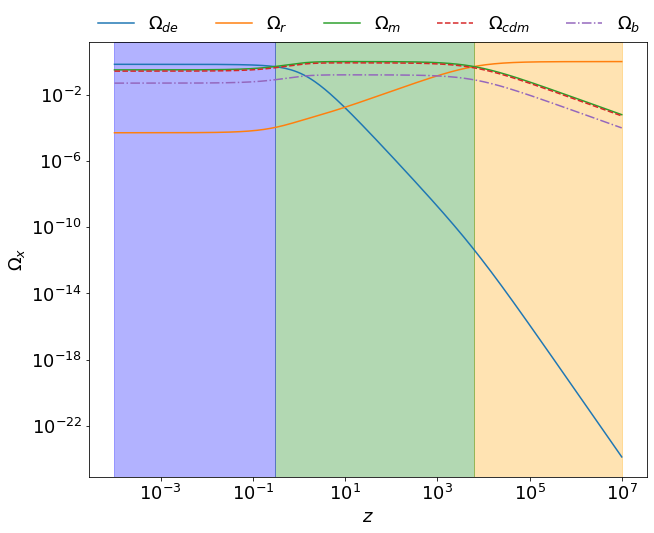

In [13]:
z_to_plot = np.logspace(-4,7.,300) #Eje de x

fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.axvspan(z_r_m,1e7,color='orange',alpha=0.3)  #Formato de las leyendas
ax.axvspan(z_m_de,z_r_m,color='green',alpha=0.3)
ax.axvspan(1e-4,z_m_de,color='blue',alpha=0.3)

ax.loglog(z_to_plot,OmegaDEz_LCDM(z_to_plot),label=r'$\Omega_{de}$')    #Ejes de y
ax.loglog(z_to_plot,OmegaRz_LCDM(z_to_plot),label=r'$\Omega_{r}$')
ax.loglog(z_to_plot,OmegaMz_LCDM(z_to_plot),label=r'$\Omega_{m}$')
ax.loglog(z_to_plot,OmegaCDMz_LCDM(z_to_plot),'--',label=r'$\Omega_{cdm}$')
ax.loglog(z_to_plot,OmegaBz_LCDM(z_to_plot),'-.',label=r'$\Omega_{b}$')

ax.set_xlabel(r'$z$',fontsize=18)
ax.set_ylabel(r'$\Omega_x$',fontsize=18)
ax.legend(ncol=5, borderaxespad=0.,bbox_to_anchor=(1., 1.08),frameon=False,fontsize=18)

In [9]:
# parametro de desaceleracion
def qz_LCDM(z):
    qz = 0.5*(OmegaMz_LCDM(z) + 2*OmegaRz_LCDM(z) - 2*OmegaDEz_LCDM(z))
    return qz


In [10]:
# redshift de transicion de q > 0 ----> q < 0
from scipy import optimize
z_trans = optimize.root_scalar(qz_LCDM,bracket=[0.5,1.5])

Text(0, 0.5, '')

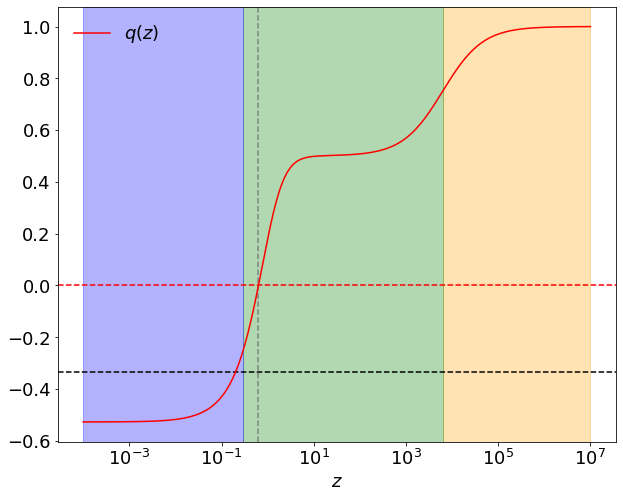

In [14]:
z_to_plot = np.logspace(-4,7.,300)

fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.axvspan(z_r_m,1e7,color='orange',alpha=0.3)
ax.axvspan(z_m_de,z_r_m,color='green',alpha=0.3)
ax.axvspan(1e-4,z_m_de,color='blue',alpha=0.3)

ax.axhline(0.,color='red',ls='--')
ax.axhline(-1./3.,color='k',ls='--')

ax.axvline(z_trans.root,color='gray',ls='--')

ax.semilogx(z_to_plot,qz_LCDM(z_to_plot),color='red',label=r'$q(z)$')

ax.legend(loc=0,frameon=False)

ax.set_xlabel(r'$z$',fontsize=18)
ax.set_ylabel(r'',fontsize=18)

In [15]:
z_trans

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.6319880886219578

Dada la definicion $H = \frac{\dot{a}}{a} = \frac{\dot{z}}{(1+z)}$, podemos calcular la edad del universo, pasamos el término de derivada instantánea de la escala a dividir, a la expresión en función al corrimiento al rojo e integramos.
$$t(z) = \int^{+\infty}_{z} \frac{dz}{(1+z)H(z)}$$

In [16]:
from scipy import integrate

def tz_LCDM(z):
    finte = lambda z: 1/((1+z)*H0*Ez_LCDM(z))
    tz = integrate.quad(finte,z,np.infty)[0] # Aqui [Mpc*s/km]
    tz = 1e4*tz/3.24076/3.15 # Transformacion a Gyr
    return tz

tz_LCDM = np.vectorize(tz_LCDM)

Text(0, 0.5, '$t(z)$ [Gyr]')

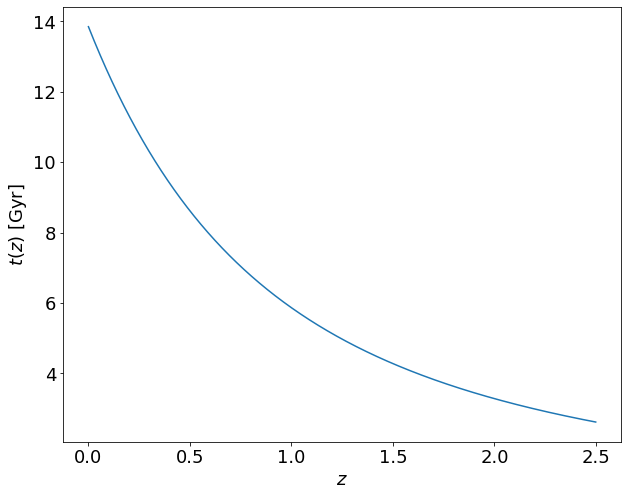

In [17]:
z_to_plot = np.arange(0.,2.5,0.001)

fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(z_to_plot,tz_LCDM(z_to_plot))

ax.set_xlabel(r'$z$',fontsize=18)
ax.set_ylabel(r'$t(z)$ [Gyr]',fontsize=18)

Donde podemos observar que el tiempo de vida del universo está en derredor a los $14*10^9$ años. Según el corrimiento al rojo alcanza el punto cercano a 0.